In [ ]:
# José G. Portela

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statistics
import os
# from scipy.stats import ttest_ind
# from matplotlib.ticker import FuncFormatter
# from matplotlib.ticker import ScalarFormatter

In [6]:
df = pd.read_csv("../lab-eda-bivariate/amz_uk_price_prediction_dataset.csv")
df.head()
# 2443651 rows × 9 columns

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part 1: Analyzing Best-Seller Trends Across Product Categories

In [8]:
# Crosstab Analysis

# Crosstab
crosstab_df = pd.crosstab(df['category'], df['isBestSeller'])

# Proportion

crosstab_df['Proportion_BestSeller'] = crosstab_df[1] / (crosstab_df[0] + crosstab_df[1])

# Sorting categories based on proportions

sorted_crosstab = crosstab_df.sort_values(by='Proportion_BestSeller', ascending=False)

sorted_crosstab

isBestSeller,False,True,Proportion_BestSeller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [ ]:
"""
Are there categories where being a best-seller is more prevalent?

Based on the crosstab we could say that the Grocery, Smart Home Security & Lighting, Health & Personal Care
shows to be the best-seller products more prevalent and Mobile Phone Accessories and Power & Hand Tools are 
closer to those more prevalent.  
"""

In [9]:
# Statistical Test

from scipy.stats import chi2_contingency
from numpy import sqrt

# Chi-square test
chi2, p, _, _ = chi2_contingency(crosstab_df[[0, 1]])

# Cramér's V
n = crosstab_df.sum().sum()
v = sqrt(chi2 / (n * min(crosstab_df.shape) - 1))


print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Cramér's V: {v}")


Chi-square value: 36540.20270061387
P-value: 0.0
Cramér's V: 0.07060006909387963


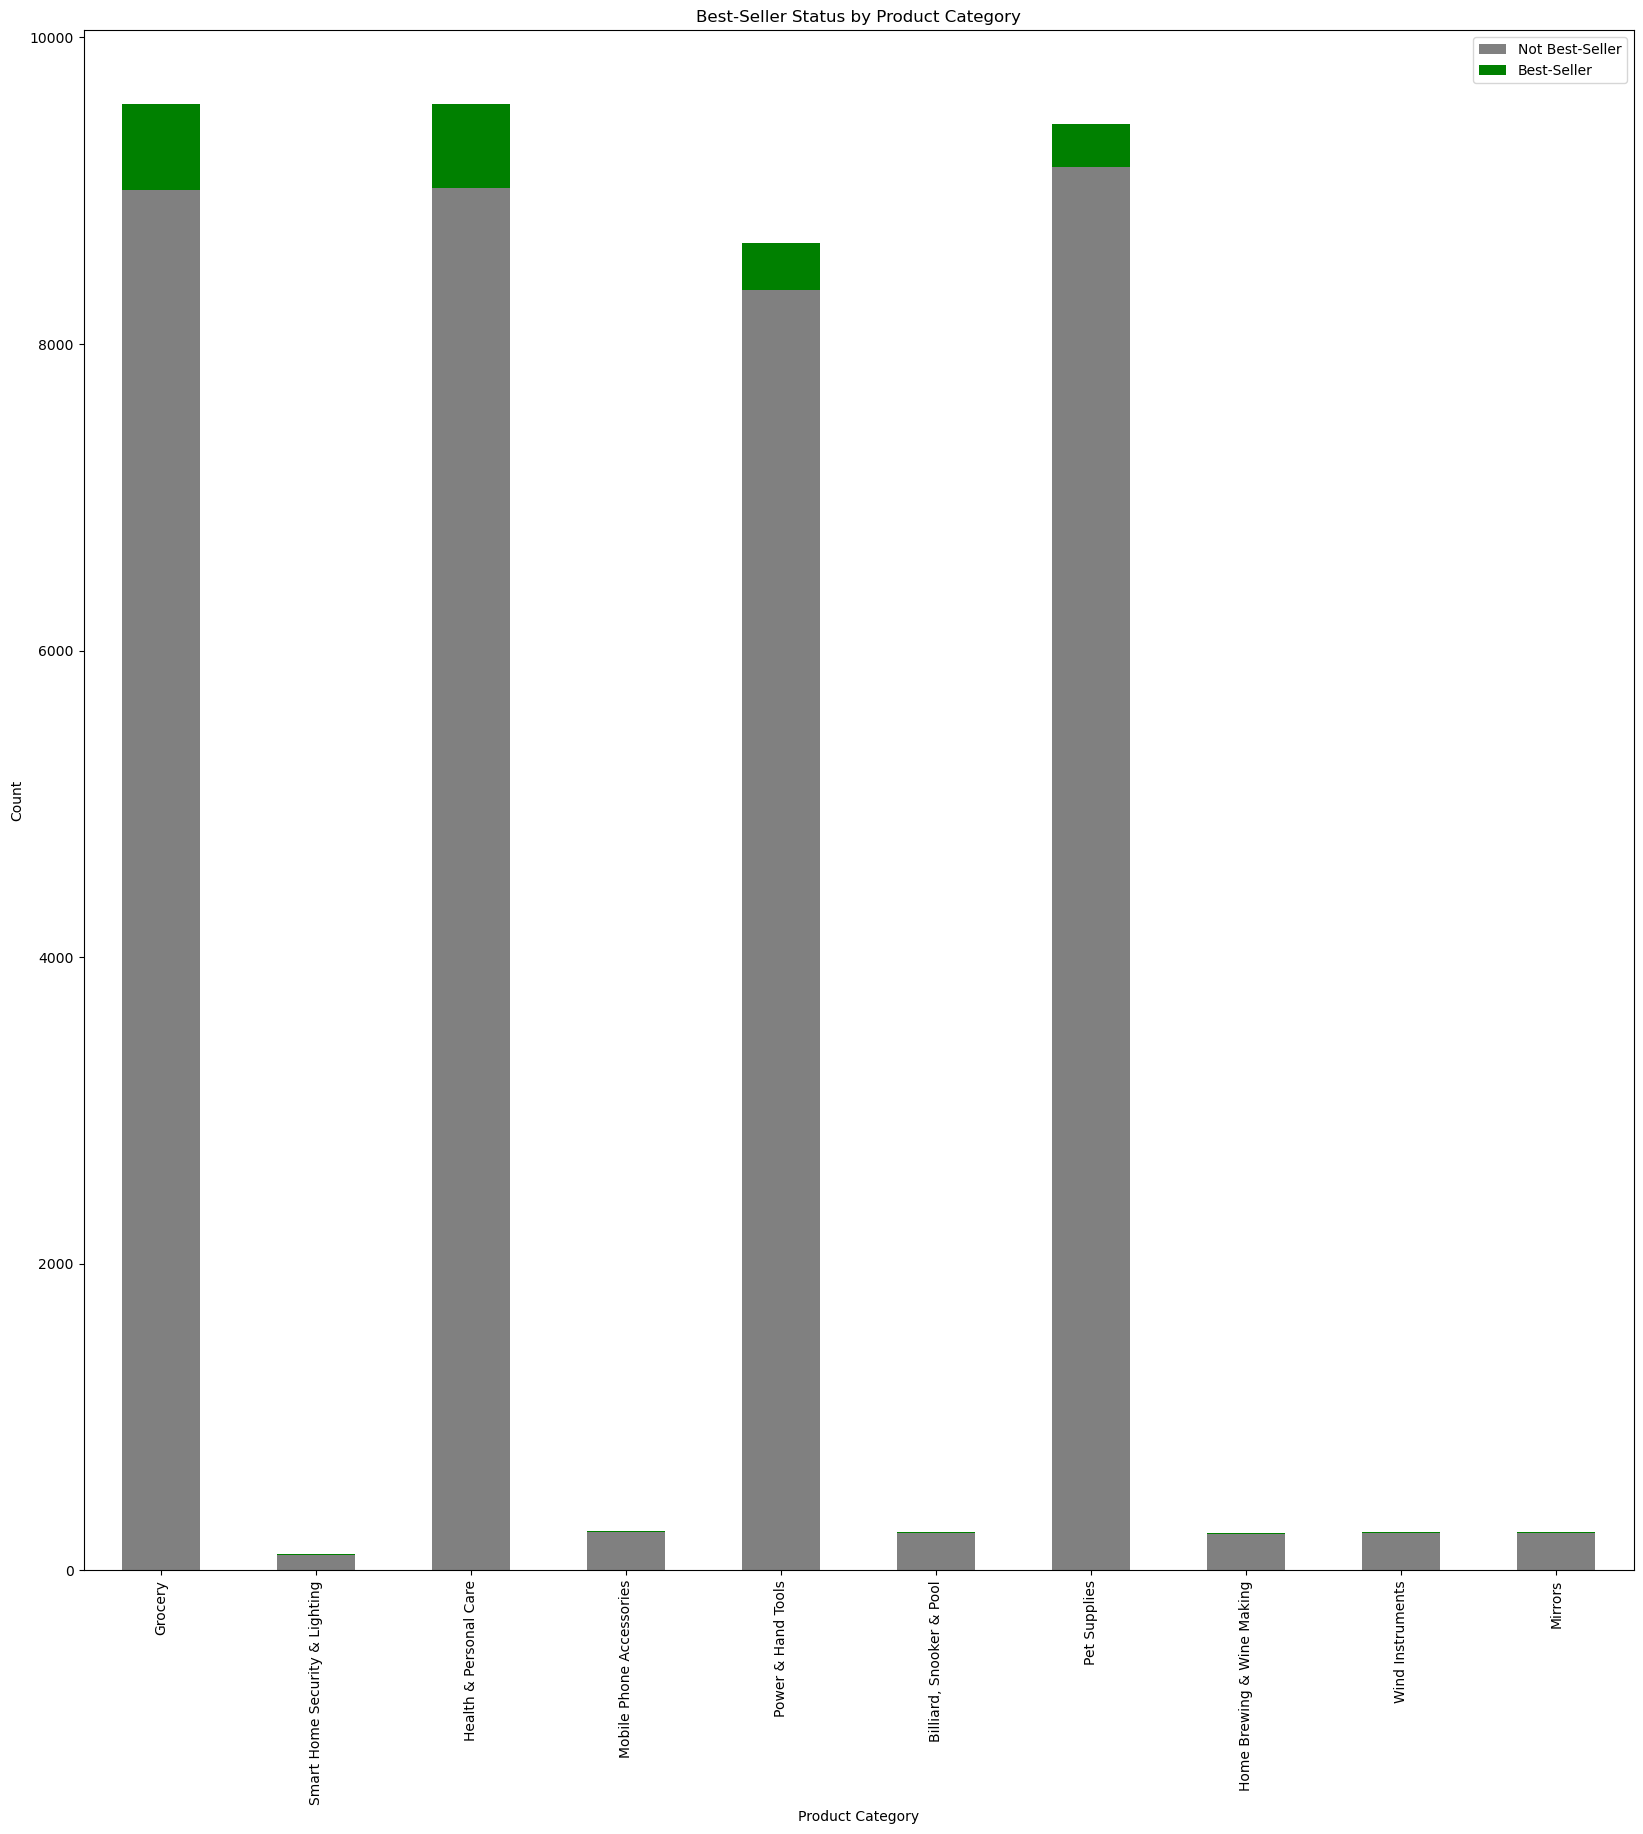

In [14]:
# Visualization

sorted_crosstab[[0, 1]].head(10).plot(kind='bar', stacked=True, figsize=(20, 20), color=['grey', 'green'])
plt.title('Best-Seller Status by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(['Not Best-Seller', 'Best-Seller'], loc='upper right')
plt.show()

## Exploring Product Prices and Ratings Across Categories and Brands

In [15]:
# Removing Outliers

# Calculating the IQR 
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Lower and Upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

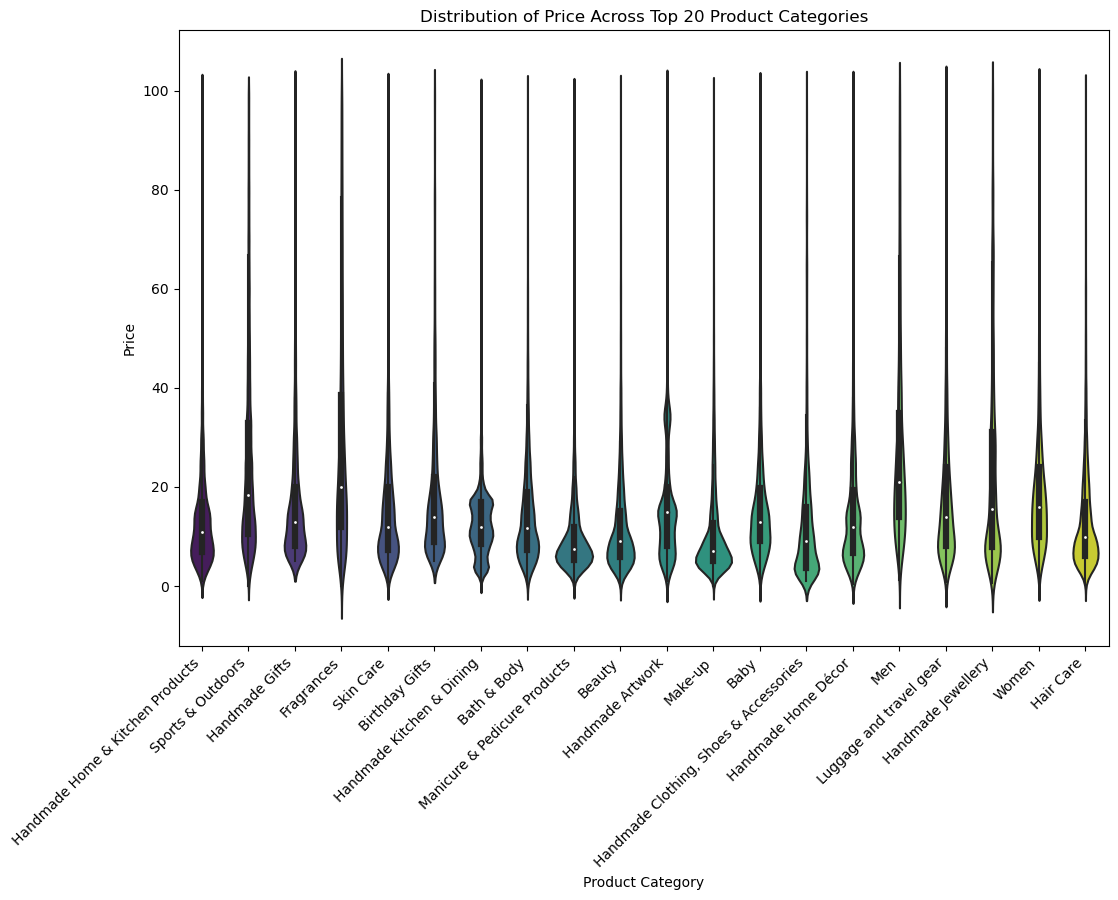

In [17]:
# Violin Plot

top_20 = df_no_outliers['category'].value_counts().head(20).index
filter_df = df_no_outliers[df_no_outliers['category'].isin(top_20)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=filter_df, palette='viridis')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right') # option that rotates the x-axis tick labels by 45 degrees and aligns them to the right 
plt.show()

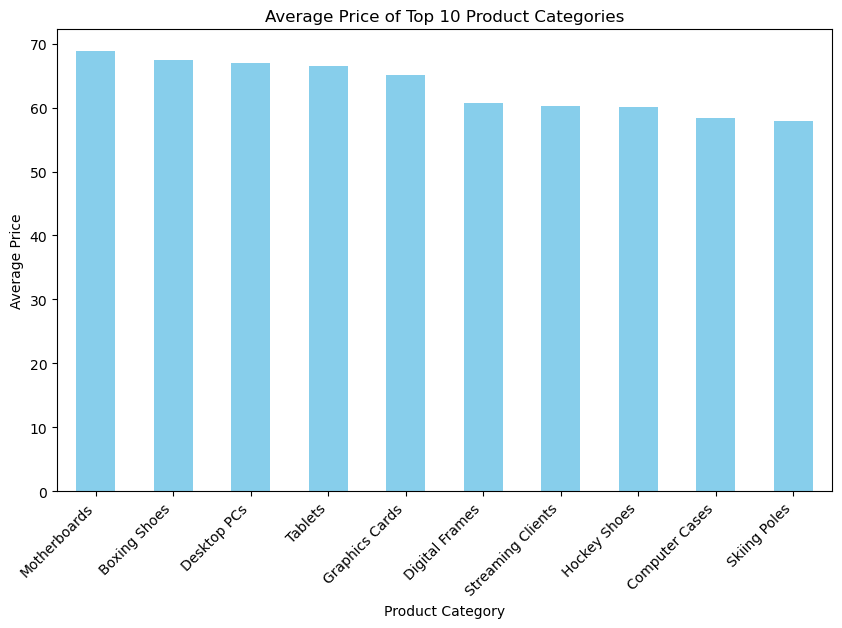

In [18]:
# Bar chart

# Average price for each category
avg_price_by_category = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Price of Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right') # option that rotates the x-axis tick labels by 45 degrees and aligns them to the right
plt.show()


In [ ]:
"""
Which product category commands the highest average price?

The Motherboards category, following the Boxing Shoes as a close second in
the highest average price
"""

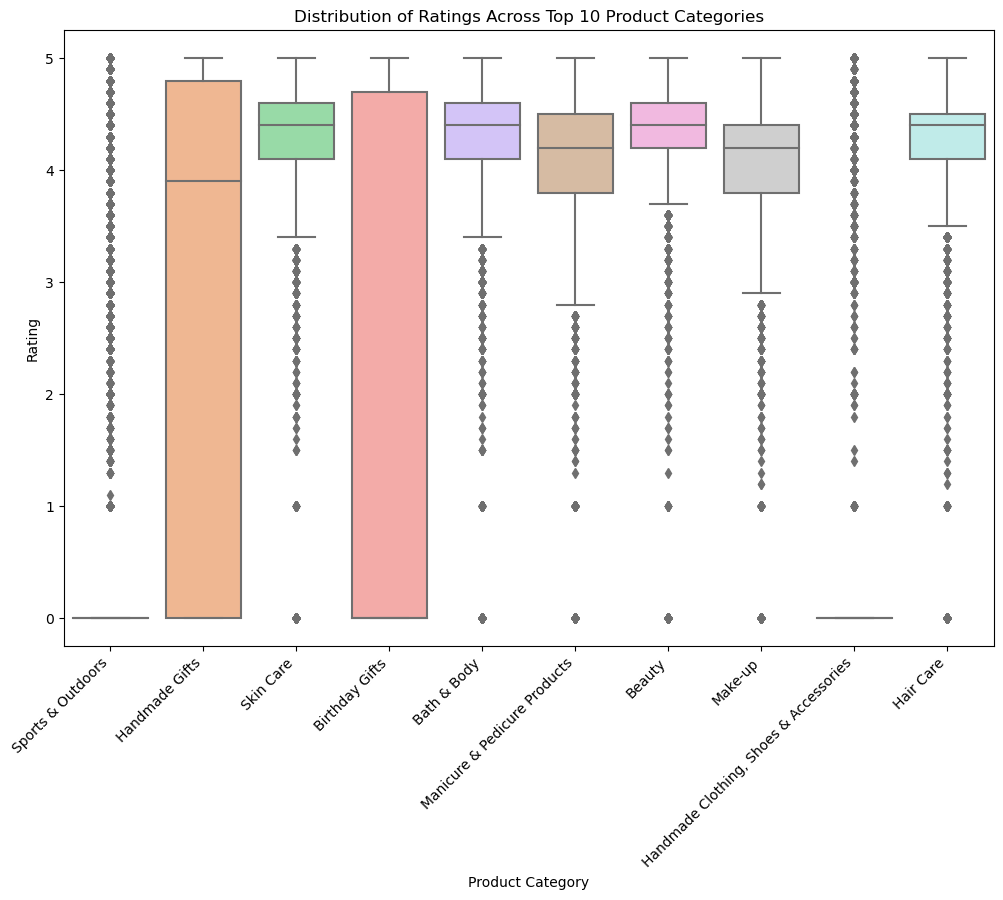

In [21]:
# Box plot

# Top 10 categories based on count
top_categories_count_boxplot = df_no_outliers['category'].value_counts().head(10).index
filter_df_boxplot = df_no_outliers[df_no_outliers['category'].isin(top_categories_count_boxplot)]


plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=filter_df_boxplot, palette='pastel')
plt.title('Distribution of Ratings Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right') # option that rotates the x-axis tick labels by 45 degrees and aligns them to the right
plt.show()


In [ ]:
"""
Which category tends to receive the highest median rating from customers?

Handmade gifts, since by only looking at the Birthday gifts category we can't 
determine if the median is overlaping to the lower or upper quartile.

"""

## Investigating the Interplay Between Product Prices and Ratings

In [36]:
# Correlation Coefficients

correlation_coefficients = df_no_outliers['price'].corr(df_no_outliers['stars'])
correlation_coefficients


-0.0776729987818137

In [ ]:
"""
- Is there a significant correlation between product price and its rating?

Since the correlation coefficient close is to 0, it suggests a weak linear association
between the two variables (price and rating(stars)).In other words there is not a strong linear 
relationship between these two variables.

"""

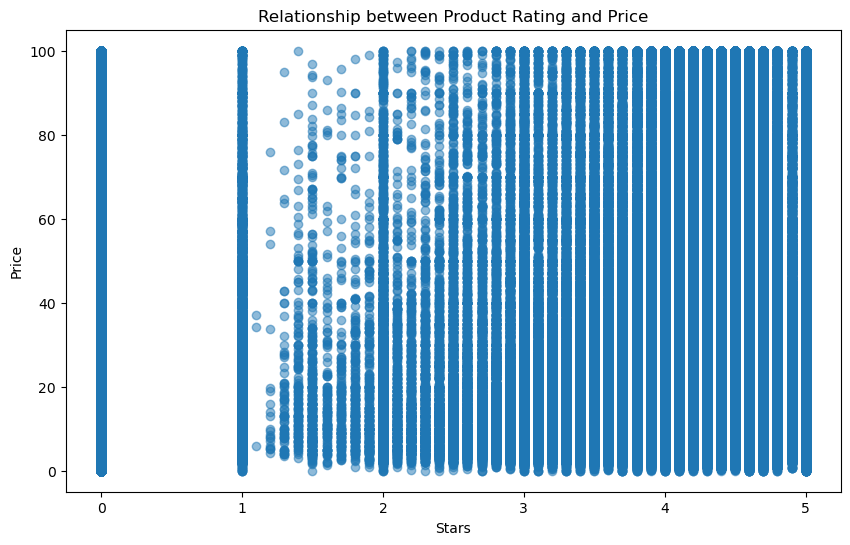

In [27]:
# Scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df_no_outliers['stars'], df_no_outliers['price'], alpha=0.5)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Stars')
plt.ylabel('Price')
plt.show()

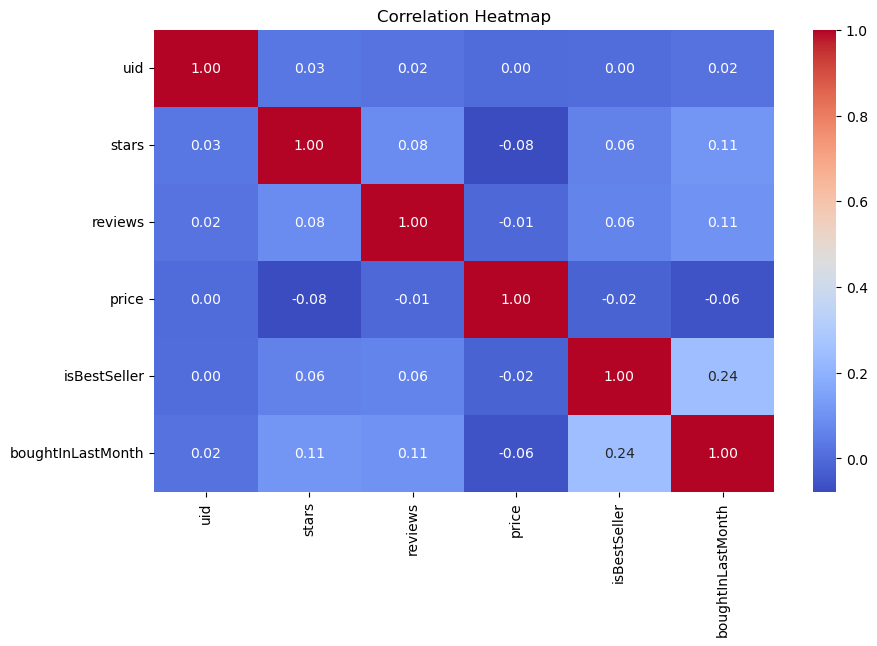

In [26]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm', fmt=".2f") # generates a correlation heatmap with annotations, using the 'coolwarm' colormap and formatting the values with two decimal places 
plt.title('Correlation Heatmap')
plt.show()

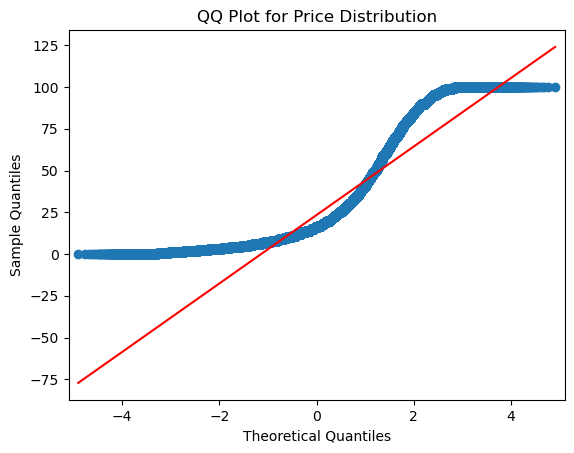

In [28]:
# QQ plot for price distribution
from statsmodels.graphics.gofplots import qqplot

qqplot(df_no_outliers['price'], line='s')
plt.title('QQ Plot for Price Distribution')
plt.show()


## Without taking out the outliers

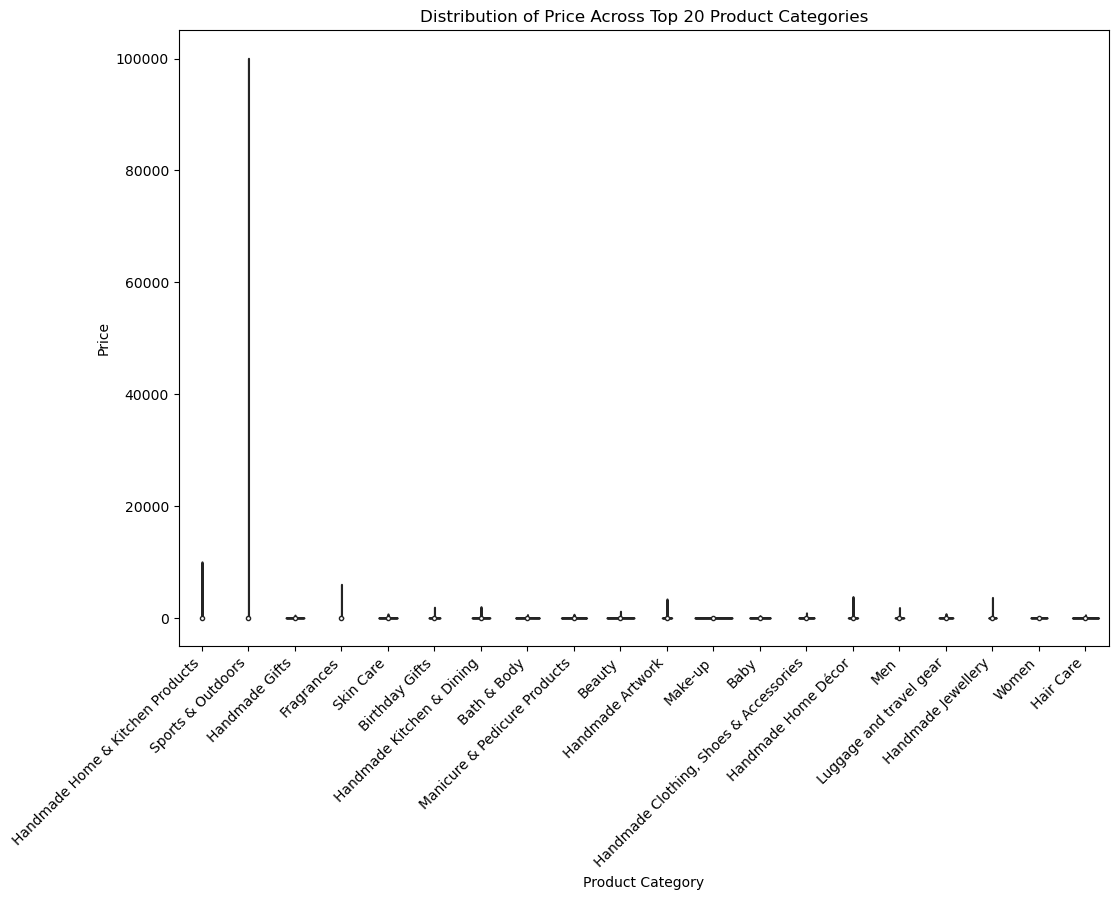

In [29]:
# Violin Plot

top_20 = df['category'].value_counts().head(20).index
filter_df = df[df['category'].isin(top_20)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=filter_df, palette='viridis')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right') # option that rotates the x-axis tick labels by 45 degrees and aligns them to the right
plt.show()

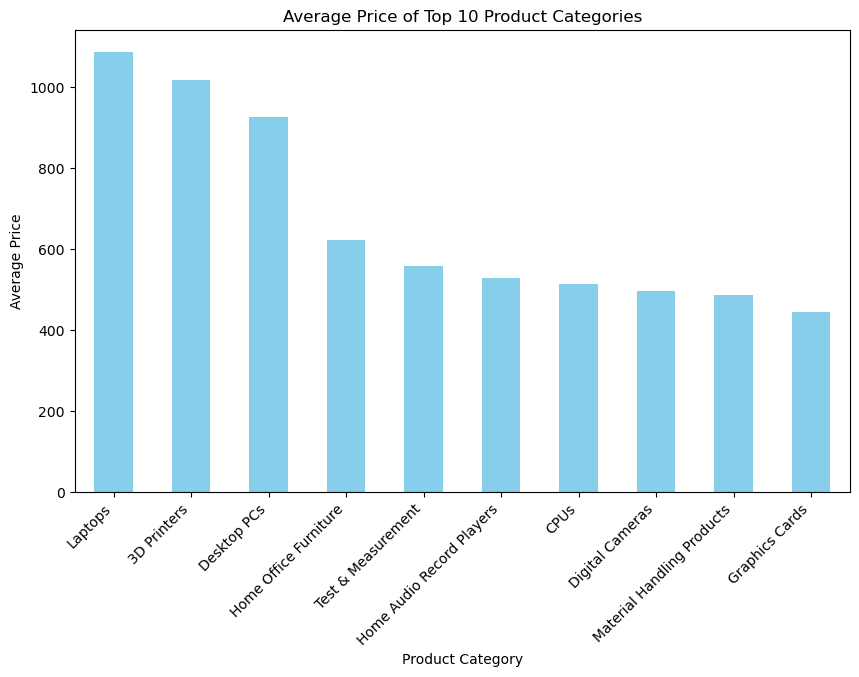

In [30]:
# Bar chart

# Average price for each category
avg_price_by_category = df.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Price of Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

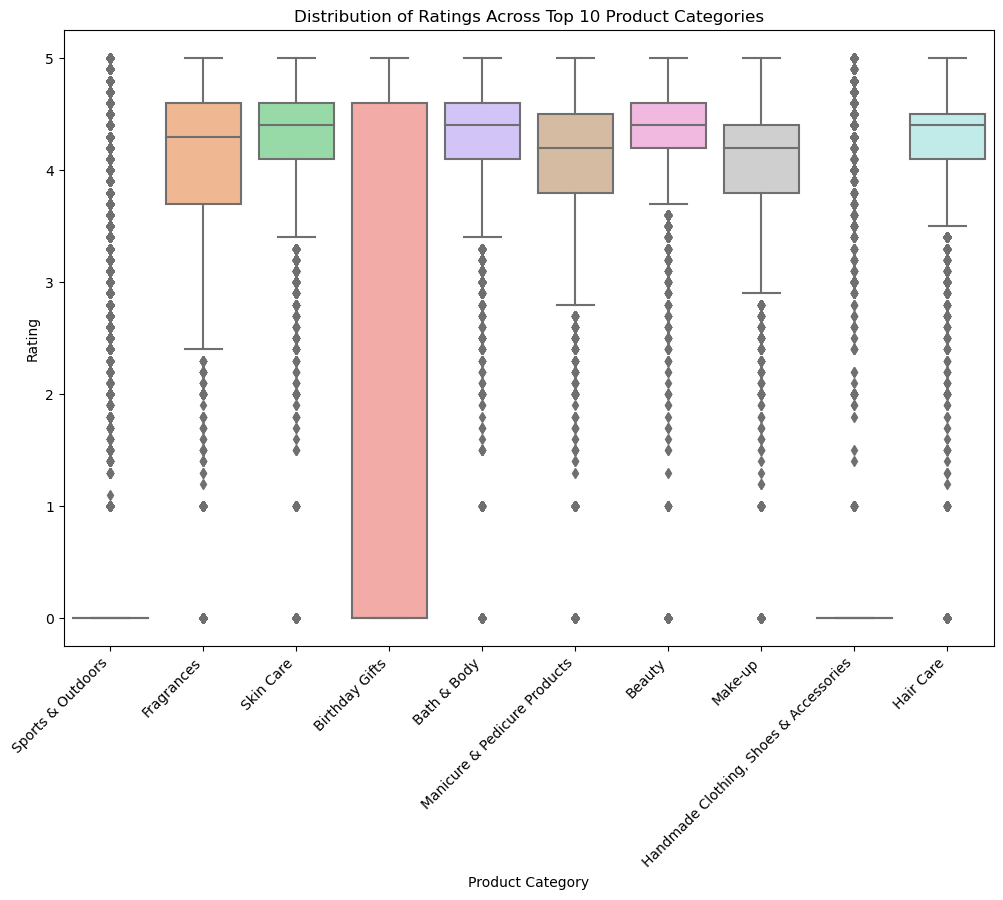

In [31]:
# Box plot

# Top 10 categories based on count
top_categories_count_boxplot = df['category'].value_counts().head(10).index
filter_df_boxplot = df[df['category'].isin(top_categories_count_boxplot)]


plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=filter_df_boxplot, palette='pastel')
plt.title('Distribution of Ratings Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


In [37]:
# Correlation Coefficients

correlation_coefficients1 = df['price'].corr(df['stars'])
correlation_coefficients1

-0.1249067326214861

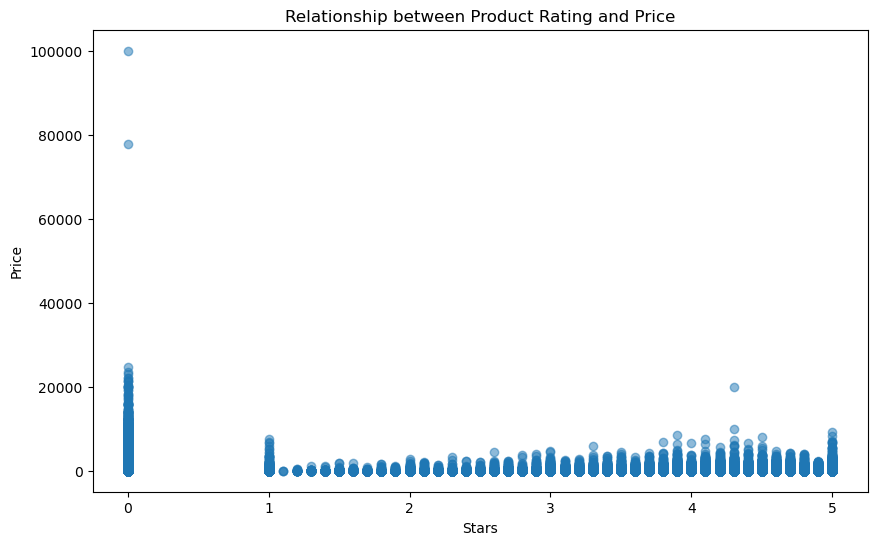

In [32]:
# Scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df['stars'], df['price'], alpha=0.5)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Stars')
plt.ylabel('Price')
plt.show()

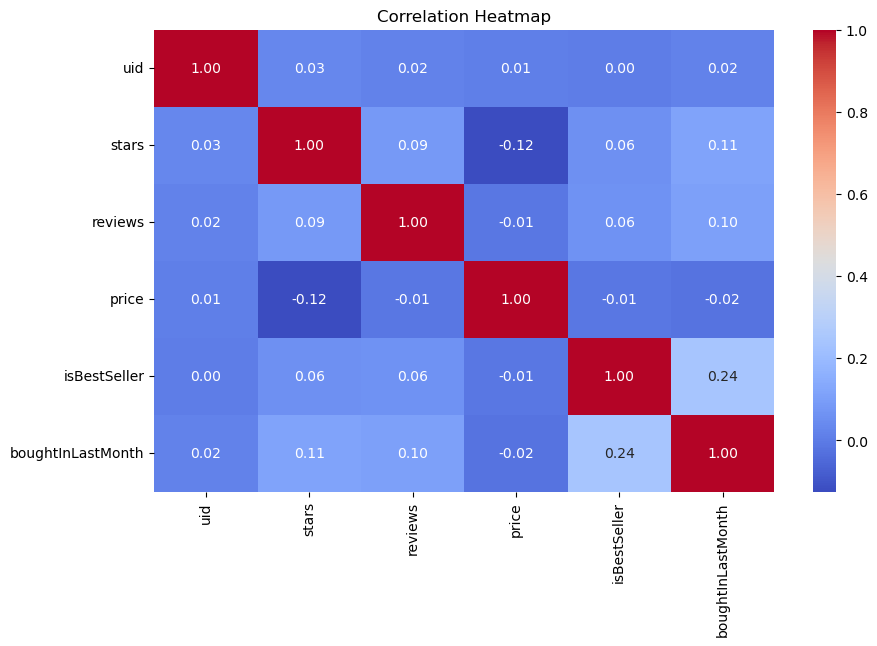

In [33]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f") # generates a correlation heatmap with annotations, using the 'coolwarm' colormap and formatting the values with two decimal places
plt.title('Correlation Heatmap')
plt.show()

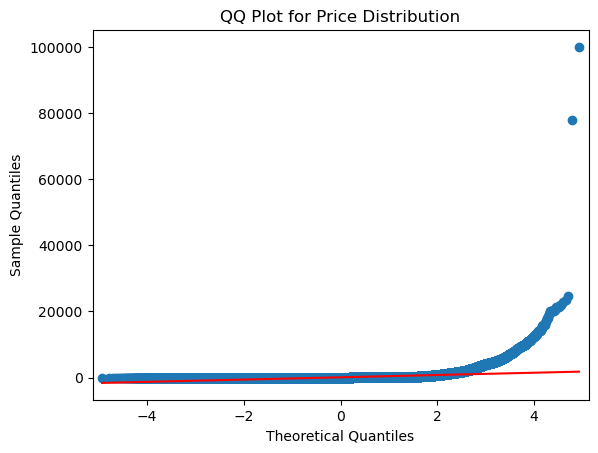

In [34]:
# QQ plot for price distribution
from statsmodels.graphics.gofplots import qqplot

qqplot(df['price'], line='s')
plt.title('QQ Plot for Price Distribution')
plt.show()
